<b> MIS 382N: ADVANCED MACHINE LEARNING<b>

Assignment 2

Total points: 70

Due: Friday, September 23 to be submitted via Canvas by 11:59 pm
    
#### Authors -
Mihir Deshpande - md46487
    
Samarth Mishra - sm79247

Your homework should be written in a python notebook. If you prefer, you can work in groups of two. **Please note that only one student per team needs to submit the assignment on Canvas but make sure to include both students' names and UT EIDs.**

For any question that requires a handwritten solution, you may upload scanned images of your solution in the notebook or attach them to the assignment . You may write your solution using markdown as well.

Please make sure your code runs and the graphs and figures are displayed in your notebook before submitting. (%matplotlib inline)

# Question 1: Bias and Variance (10 pts)

(a). (4 pts) Describe the difference between model bias and the bias of a point estimator. 

(b) (6 pts). How can you use a learning curve to determine whether a model is overfitting  (for a given sample size)? Discuss this with respect to the observed train and validation error curves. How does your answer change if the model you are trying to determine if the model is underfitting?

# Answer : 

# A)
For broad strokes purposes, point estimators are functions that calculate parameters for the distribution a single random variable while models capture the relationship between two or more random variables.

Eg. The age and income of a population can be expressed as two separate random variables X1 and X2 with assumed Normal distributions with means M1, M2 and standard deviations S1, S2 respectively. You will need two separate point estimators to estimate the distribution parameters for age and income.

A point estimator will help us determine the parameters of the distributions of X1 and X2 given a sample set of data points from each. This point estimator is said to be biased when the function fails to capture in it's entirety certain relationships between points from the same population distribution based on the sample points and mathematically underestimates or overestimates the parameters of the population distribution.

Eg. Maximum Log Likelihood function for a normal distribution is able to give unbiased estimates of the Mean of the population distribution. However, it fails to capture the true variance of the population based on the sample and systematically underestimates it by a factor of $(N-1)/N$ where $N=\text{No. of data points in sample}$.

So a point estimator might systematically underestimate the variance in a populations age (X1) and income (X2).

When we talk about models, they are equations that try to capture relationships between two or more random variables X1 and X2, i.e one single model will capture the relationship between them.

If we talk about parametric models, we assume that the variables follow a certain type of relationship (equation) and hence, try to find the values of the co-efficients/parameters of that equation that best capture the relationship. 

Eg. We can assume there is a linear relationship between Age (X1) and Income (X2). If we write the equation as $X2 = m*X1 + c$, where $m=\text{slope of the line}$ and $c=\text{intercept of line}$, we can then try to find the values of $m$ and $c$ such that we can best predict the Income (X2) of a person given his/her age.

A model is said to be biased when it fails to sufficiently capture the relationship between the variables (maybe due to an incorrect assumption of relationship in parametric models) and systematically gives incorrect predictions. This might be because the the model fails to capture certain patterns in the data.

Eg. If, in reality, the income of a person (X2) depended on the square of his/her age (X1) i.e a square relationsip but we assumed that the relationship was linear, our linear model will systematically give us an incorrect prediction of the salary basd on age since a straight line cannot completely capture the pattern of a square curve regardless of the value of slope or intercept. In this case we would say that the model is highly biased.

# B)

Let's define a learning curve for a regression model where the x-axis is the no. of samples that the model is trained on and y-axis as the RMSE as follows -

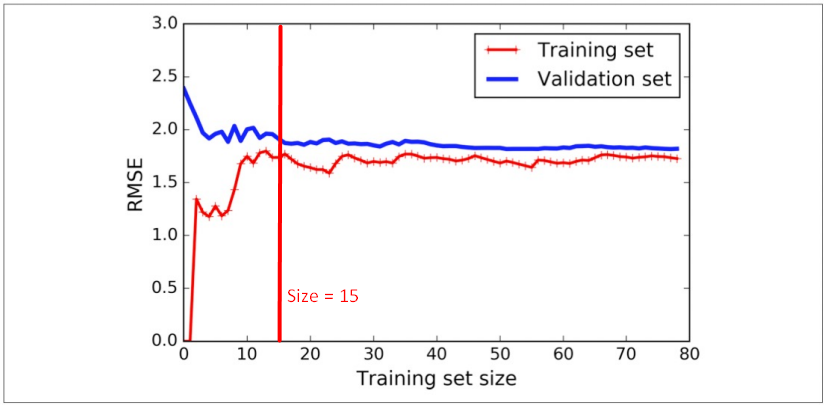

Overfitting is a phenomenon when the model follows the training data too closely (maybe due to too many degrees of freedom or too many iterations). This means that while the model might give very low RMSE when run on the data that it was trained on, it will perform much worse on data that it hasn't seen before (validation set). Hence, a learning curve for an overfitted model will be characterized by -

1) Very low training set RMSE

2) Very high validation set RMSE in the same range

We can observe in the above chart that the model tends to overfit the training set till the training set size = 15 but tends to stabilize when we increase the size further.

Conversely, underfitting is the phenomenon when the model is unable to capture the patterns in the training dataset effectively and hence both the training set and the validation set tend to give a high RMSE. If the minimum RMSE observed in the learning curve after stabilization (area to the RIGHT of size = 15) is too high for eg. Not explainable by noise, your model may be underfitting. Another scenario where you might observe underfitting is when the RMSE for validation set that you start with for smaller values of training set size does not change by much as you increase set size i.e more data points do not help the model perform any better -

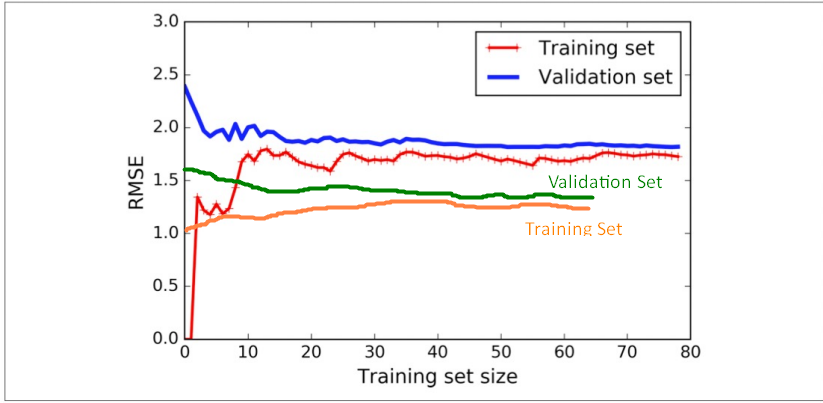

We can show this scenario looking at the orange and green curves for Training and Validation set respectively. Hence, a learning curve for an underfitted model can be characterized by -

1) Unexpectedly high RMSE after stabilization

2) No substantial increase or decrease in RMSE after increasing training set size


Both scenarios are undesirable and we should be on the lookout for them.

# Question 2: Bias-Variance Exploration (20 pts)
We want to build a model that can predict y for unknown inputs x.

(a) (10 pts) Fit polynomial models of degrees 2, 4, 7 to the training data. Print out the mean squared error (on both train and test sets) for all the models. Plot the data (y_train vs x_train and y_test vs x_test), the fitted models (predictions on x_all by different models vs x_all), and the predictions on the test set (predictions on x_test by different models vs x_test). All the plots must be in the same figure and be clearly labeled. Tips: you can use np.vander(np.squeeze(x_train), deg+1) to generate the deg-degree polynomial vector of x_train. For example, np.vander(np.squeeze(x_train), 3) gives you the second-degree polynomial of x_train.

(b) (5 pts) Which model gives the best performance? Explain in terms of the bias-variance tradeoff.

(c) (5 pts) Analyse how the training data size affects the bias and the variance of the models. For this, run the analysis in (a) using 20, 40, 60, 80 and all 100 data points. Make a single plot of the  𝑙𝑜𝑔(𝑀𝑆𝐸)  for both the training and the test data vs the size of the training set for each of the polynomials. State the trends you see as you change the size of the training data on each of the models and explain why you see them. You can use the following codes to load the dataset and complete the analysis:

In [177]:
from sklearn import linear_model as lm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

In [ ]:
# Only use this code block if you are using Google Colab.
# If you are using Jupyter Notebook, please ignore this code block. You can directly upload the file to your Jupyter Notebook file systems.
#from google.colab import files

## It will prompt you to select a local file. Click on “Choose Files” then select and upload the file. 
## Wait for the file to be 100% uploaded. You should see the name of the file once Colab has uploaded it.
#uploaded = files.upload()

Saving data.npy to data.npy


In [179]:
data_load = np.load('data/data.npy', allow_pickle = True)

In [180]:
x_train = data_load.item().get("Xtrain")
y_train = data_load.item().get("Ytrain")
x_test = data_load.item().get("Xtest")
y_test =data_load.item().get("Ytest")
x_all = np.linspace(-10,10,101).reshape(-1,1)

lrp = LinearRegression()


In [181]:
def plot_curves(x_train, y_train, x_test, y_test):
  # Fit polynomial models of degrees 2, 4, 7 to the training data. 
  # Print out the mean squared error (on both train and test sets) for all the models. 
  # Plot the data (y_train vs x_train and y_test vs x_test), the fitted models (predictions on x_all by different models vs x_all), and the predictions on the test set (predictions on x_test by different models vs x_test). 
    x_2_train = np.vander(np.squeeze(x_train), 3)
    x_2_test = np.vander(np.squeeze(x_test), 3)
    x_2_all = np.vander(np.squeeze(x_all), 3)
    x_4_train = np.vander(np.squeeze(x_train), 5)
    x_4_test = np.vander(np.squeeze(x_test), 5)
    x_4_all = np.vander(np.squeeze(x_all), 5)
    x_7_train = np.vander(np.squeeze(x_train), 8)
    x_7_test = np.vander(np.squeeze(x_test), 8)
    x_7_all = np.vander(np.squeeze(x_all), 8)
    
    # For Polynomial of degree 2
    lrp_2 = lrp.fit(x_2_train, y_train)
    y_pred_2 = lrp_2.predict(x_2_test)
    y_pred_2_all = lrp_2.predict(x_2_all)
    mse_2_train = mean_squared_error(y_train, lrp_2.predict(x_2_train))
    mse_2_test = mean_squared_error(y_test, y_pred_2)
    print(" Mean Squared Error for training Set (N=2) is - ", mse_2_train)
    print(" Mean Squared Error for test Set (N=2) is - ", mse_2_test)
    
    # For Polynomial of degree 4
    lrp_4 = lrp.fit(x_4_train, y_train)
    y_pred_4 = lrp_4.predict(x_4_test)
    y_pred_4_all = lrp_4.predict(x_4_all)
    mse_4_train = mean_squared_error(y_train, lrp_4.predict(x_4_train))
    mse_4_test = mean_squared_error(y_test, y_pred_4)
    print(" Mean Squared Error for training Set (N=4) is - ", mse_4_train)
    print(" Mean Squared Error for test Set (N=4) is - ", mse_4_test)
    
    # For Polynomial of degree 7
    lrp_7 = lrp.fit(x_7_train, y_train)
    y_pred_7 = lrp_7.predict(x_7_test)
    y_pred_7_all = lrp_7.predict(x_7_all)
    mse_7_train = mean_squared_error(y_train, lrp_7.predict(x_7_train))
    mse_7_test = mean_squared_error(y_test, y_pred_7)
    print(" Mean Squared Error for training Set (N=7) is - ", mse_7_train)
    print(" Mean Squared Error for test Set (N=7) is - ", mse_7_test)
    
    
    dat = {'X_TEST':x_test, 'Y_PRED':y_pred_2}
    df_2 = pd.DataFrame(dat).sort_values(by='X_TEST')
    
    dat = {'X_TEST':x_test, 'Y_PRED':y_pred_4}
    df_4 = pd.DataFrame(dat).sort_values(by='X_TEST')
    
    dat = {'X_TEST':x_test, 'Y_PRED':y_pred_7}
    df_7 = pd.DataFrame(dat).sort_values(by='X_TEST')
    
    fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(20,16))
    fig.suptitle("Plotting Polynomial Regression models of varying degrees (2, 4, 7) against X", fontsize = 16)
    axs[0][0].scatter(x_train, y_train)
    axs[0][0].set_title("Y_train vs X_train")
    axs[0][1].scatter(x_test, y_test)
    axs[0][1].set_title("Y_test vs X_test")
    axs[0][2].plot(df_2['X_TEST'], df_2['Y_PRED'], label = "Polynomial degree 2 curve")
    axs[0][2].plot(df_4['X_TEST'], df_4['Y_PRED'], label = "Polynomial degree 4 curve")
    axs[0][2].plot(df_7['X_TEST'], df_7['Y_PRED'], label = "Polynomial degree 7 curve")
    axs[0][2].legend()
    axs[0][2].scatter(x_test, y_test, label="Original Data", c="orangered")
    axs[0][2].set_title("Prediction curves for various degrees vs X_test")
    # X_ALL vs predictions
    axs[1][0].scatter(x_all, y_pred_2_all)
    axs[1][0].set_title("Polynomial degree 2")
    axs[1][1].scatter(x_all, y_pred_4_all)
    axs[1][1].set_title("Polynomial degree 4")
    axs[1][2].scatter(x_all, y_pred_7_all)
    axs[1][2].set_title("Polynomial degree 7")
    # X_Test vs predictions
    axs[2][0].scatter(x_test, y_pred_2)
    axs[2][0].set_title("Y_Pred vs X_Test (N=2)")
    axs[2][1].scatter(x_test, y_pred_4)
    axs[2][1].set_title("Y_Pred vs X_Test (N=4)")
    axs[2][2].scatter(x_test, y_pred_7)
    axs[2][2].set_title("Y_Pred vs X_Test (N=7)")

  # YOUR CODE COMES HERE
    #print("IMPLEMENT ME!")
    return [mse_2_train, mse_4_train, mse_7_train], [mse_2_test, mse_4_test, mse_7_test]

 Mean Squared Error for training Set (N=2) is -  247.2967979737153
 Mean Squared Error for test Set (N=2) is -  320.06408346977855
 Mean Squared Error for training Set (N=4) is -  31.720018057290055
 Mean Squared Error for test Set (N=4) is -  31.292082886606725
 Mean Squared Error for training Set (N=7) is -  30.677193592109717
 Mean Squared Error for test Set (N=7) is -  33.4106940776901


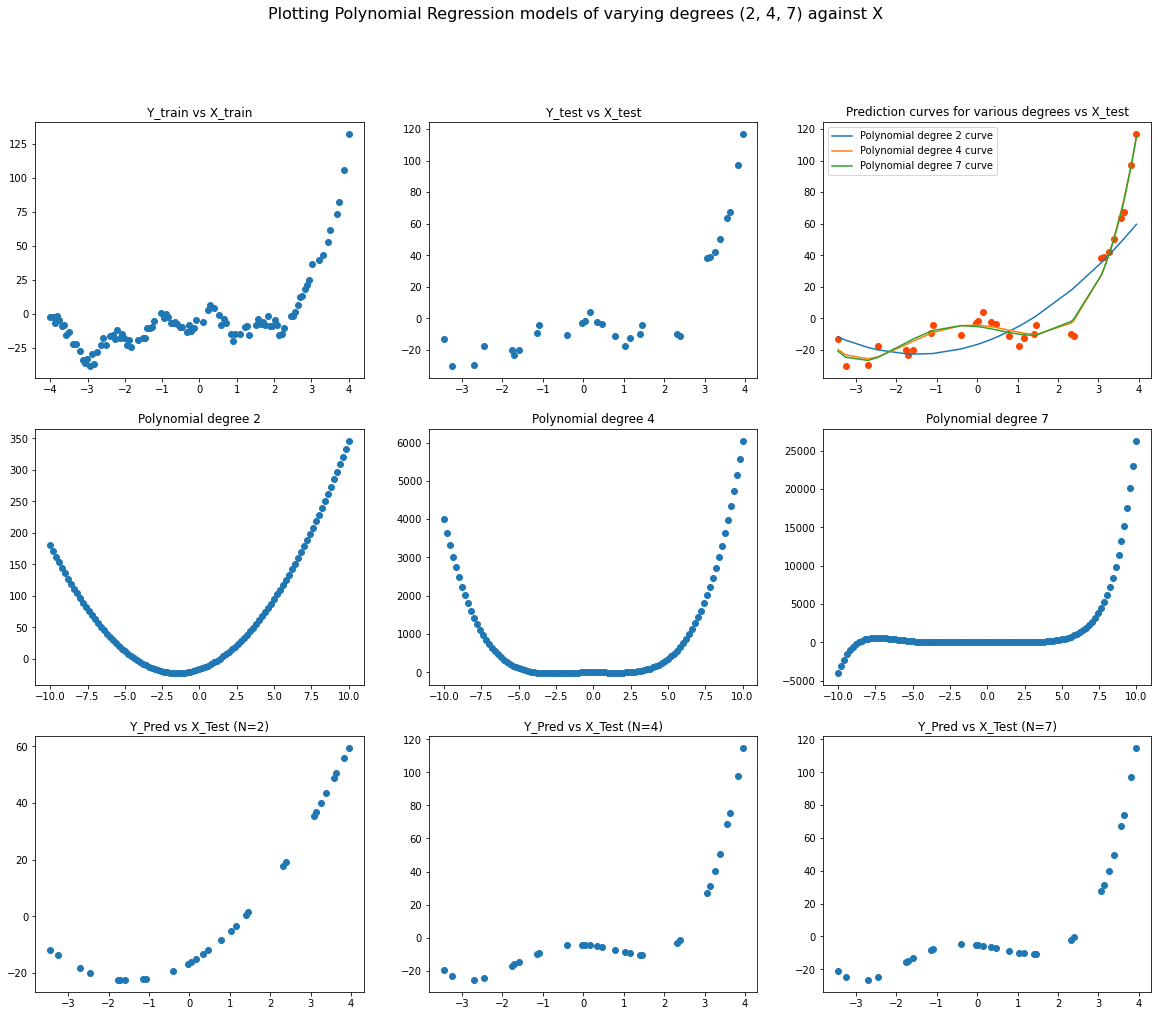

In [182]:
# Fit the different polynomials to the training data and make the plots 
train_rmses_100, test_rmses_100 = plot_curves(x_train, y_train, x_test, y_test)

## Observations)

Looking at the above plots and RMSE, we can see N=4 gives us the best performance in terms of Bias-Variance tradeoff.

When N=2, we have very high RMSE for training as well as test set.

For N=4, training set and test RMSE are comparatively much lower and similar.

However, when we increase N=7, the training set RMSE decreases but Test set RMSE increases indicating overfitting.

Hence, the model with N=4 is the best fit.

20% data
 Mean Squared Error for training Set (N=2) is -  161.1714737883004
 Mean Squared Error for test Set (N=2) is -  402.32312690992876
 Mean Squared Error for training Set (N=4) is -  35.115113139129775
 Mean Squared Error for test Set (N=4) is -  38.34074498344278
 Mean Squared Error for training Set (N=7) is -  22.543946691373346
 Mean Squared Error for test Set (N=7) is -  135.2076452675657


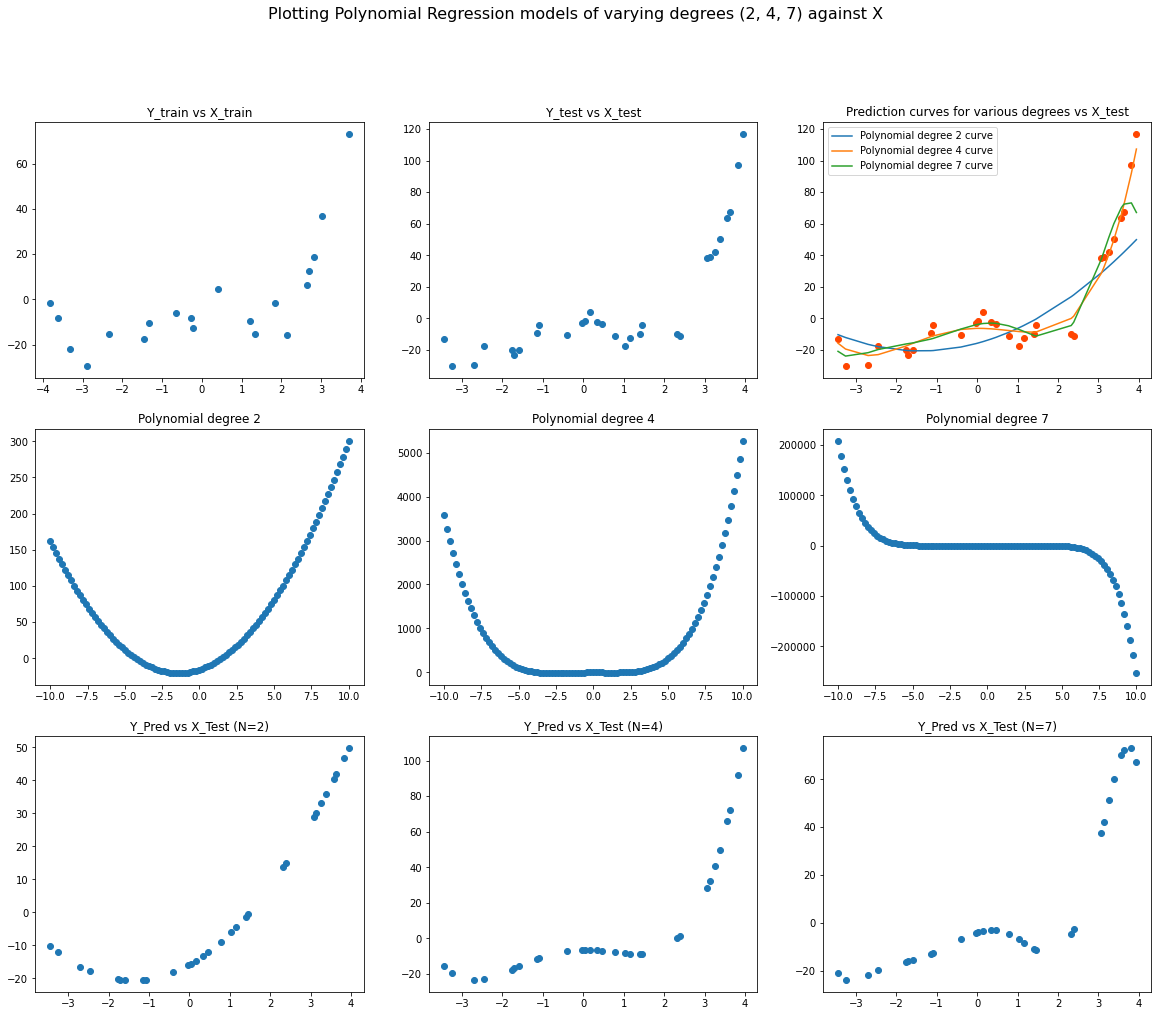

In [183]:
# Study the effects of the training data size on the bias and variance
print("20% data")
train_rmses_20, test_rmses_20 = plot_curves(x_train[40:60], y_train[40:60], x_test, y_test)

40% data
 Mean Squared Error for training Set (N=2) is -  150.33251286085704
 Mean Squared Error for test Set (N=2) is -  405.80516696165773
 Mean Squared Error for training Set (N=4) is -  31.624529646446895
 Mean Squared Error for test Set (N=4) is -  33.16428295918739
 Mean Squared Error for training Set (N=7) is -  25.492718751653634
 Mean Squared Error for test Set (N=7) is -  61.23741884551114


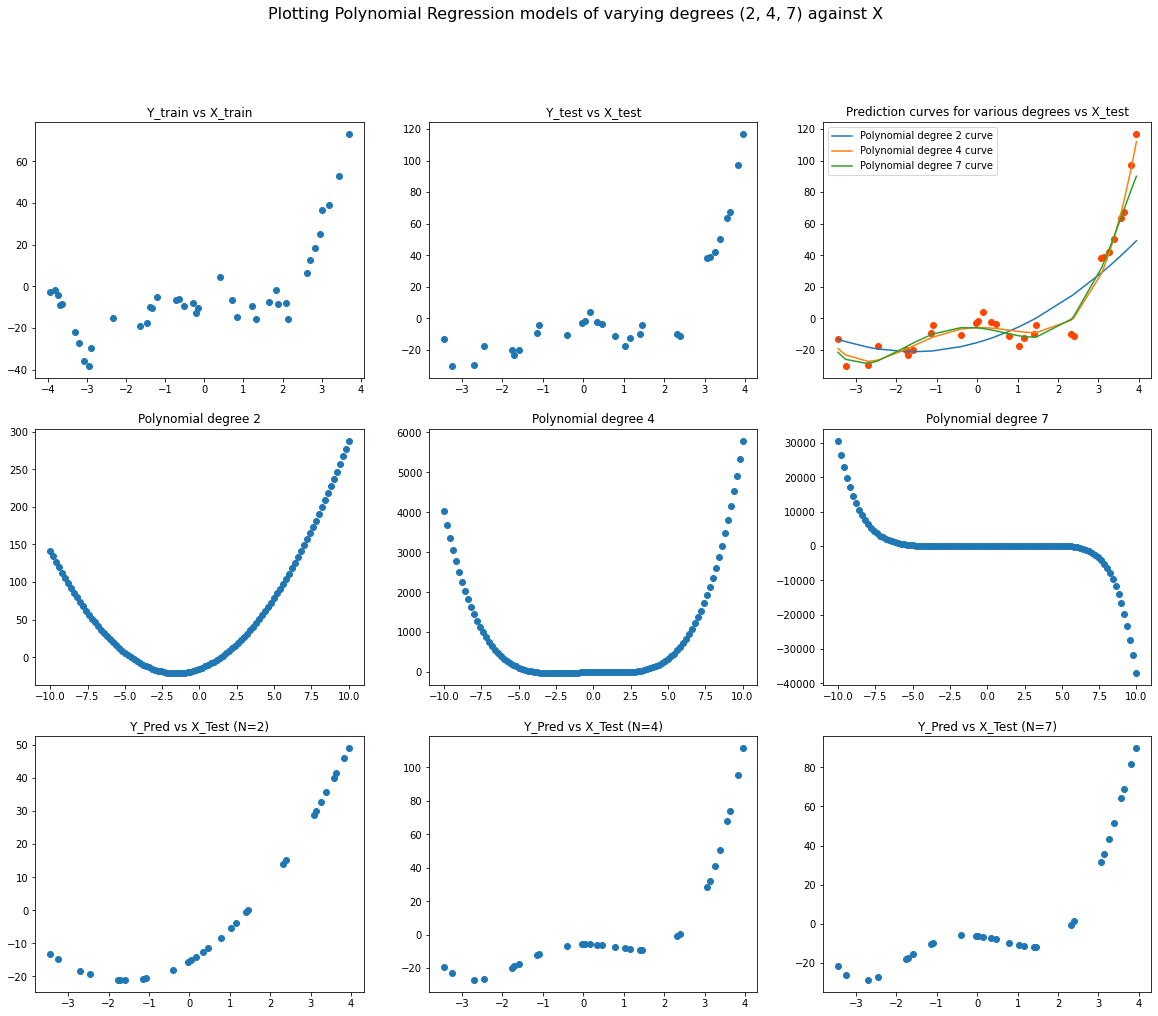

In [184]:
print("40% data")
train_rmses_40, test_rmses_40 = plot_curves(x_train[30:70], y_train[30:70], x_test, y_test)

60% data
 Mean Squared Error for training Set (N=2) is -  150.08383759141728
 Mean Squared Error for test Set (N=2) is -  403.2513784833407
 Mean Squared Error for training Set (N=4) is -  29.192805739947907
 Mean Squared Error for test Set (N=4) is -  31.78141541619673
 Mean Squared Error for training Set (N=7) is -  26.09908864245441
 Mean Squared Error for test Set (N=7) is -  60.16667237664524


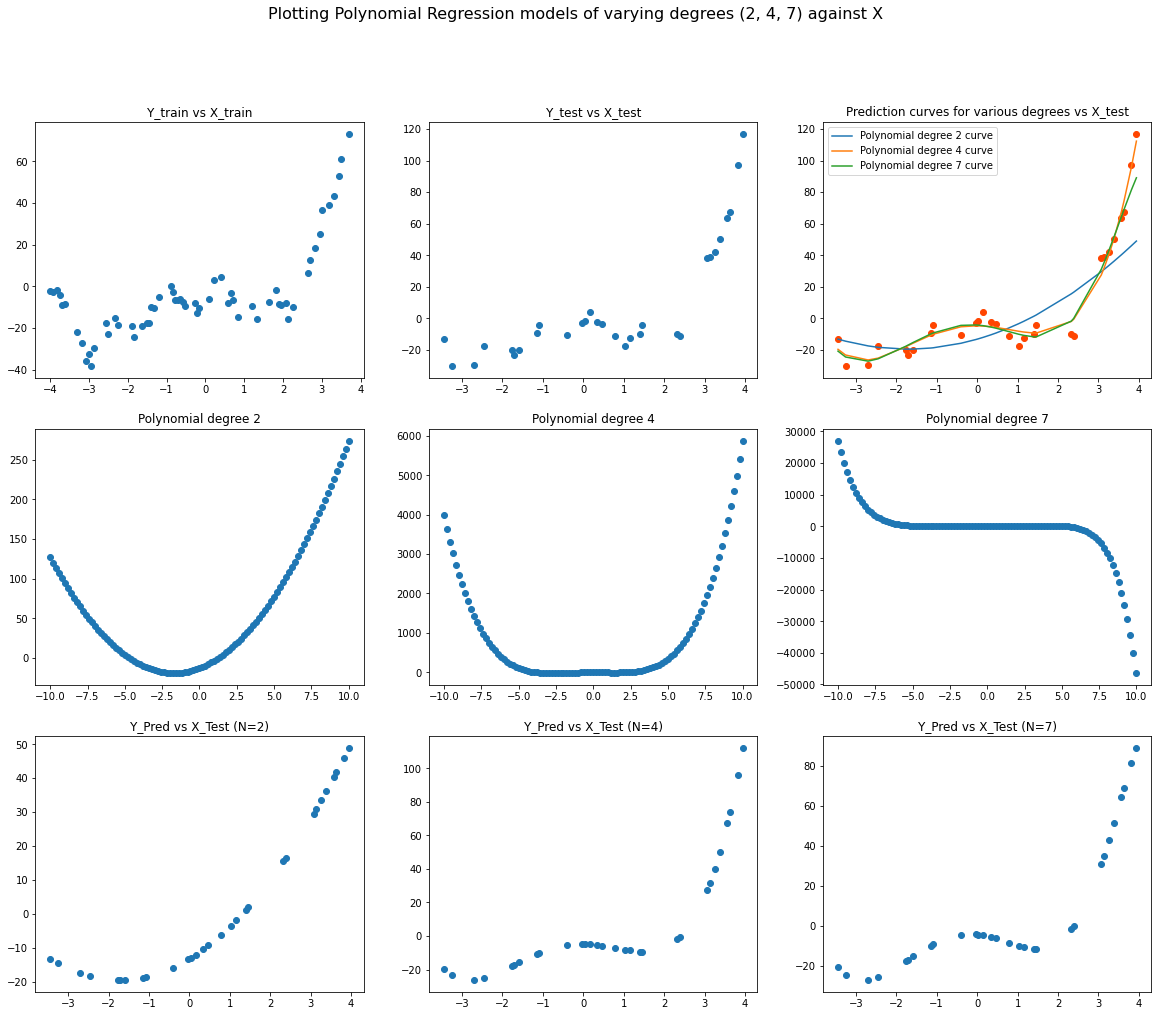

In [185]:
print("60% data")
train_rmses_60, test_rmses_60 = plot_curves(x_train[20:80], y_train[20:80], x_test, y_test)

80% data
 Mean Squared Error for training Set (N=2) is -  168.1188246150281
 Mean Squared Error for test Set (N=2) is -  407.59369688184694
 Mean Squared Error for training Set (N=4) is -  29.305108483323448
 Mean Squared Error for test Set (N=4) is -  32.518106868742635
 Mean Squared Error for training Set (N=7) is -  26.54912959628363
 Mean Squared Error for test Set (N=7) is -  48.0769352971074


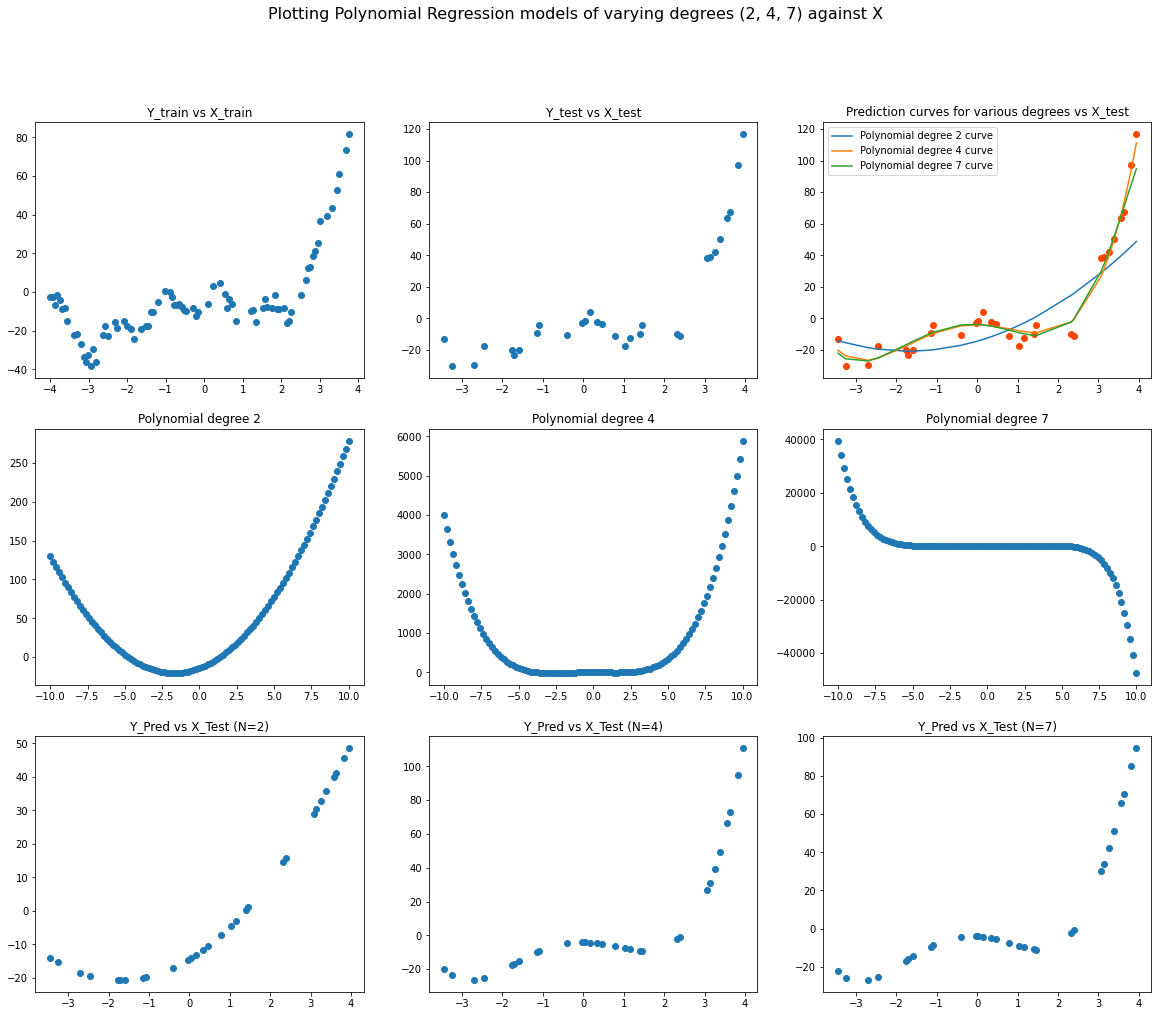

In [186]:
print("80% data")
train_rmses_80, test_rmses_80 = plot_curves(x_train[10:90], y_train[10:90], x_test, y_test)

100% data
 Mean Squared Error for training Set (N=2) is -  247.2967979737153
 Mean Squared Error for test Set (N=2) is -  320.06408346977855
 Mean Squared Error for training Set (N=4) is -  31.720018057290055
 Mean Squared Error for test Set (N=4) is -  31.292082886606725
 Mean Squared Error for training Set (N=7) is -  30.677193592109717
 Mean Squared Error for test Set (N=7) is -  33.4106940776901


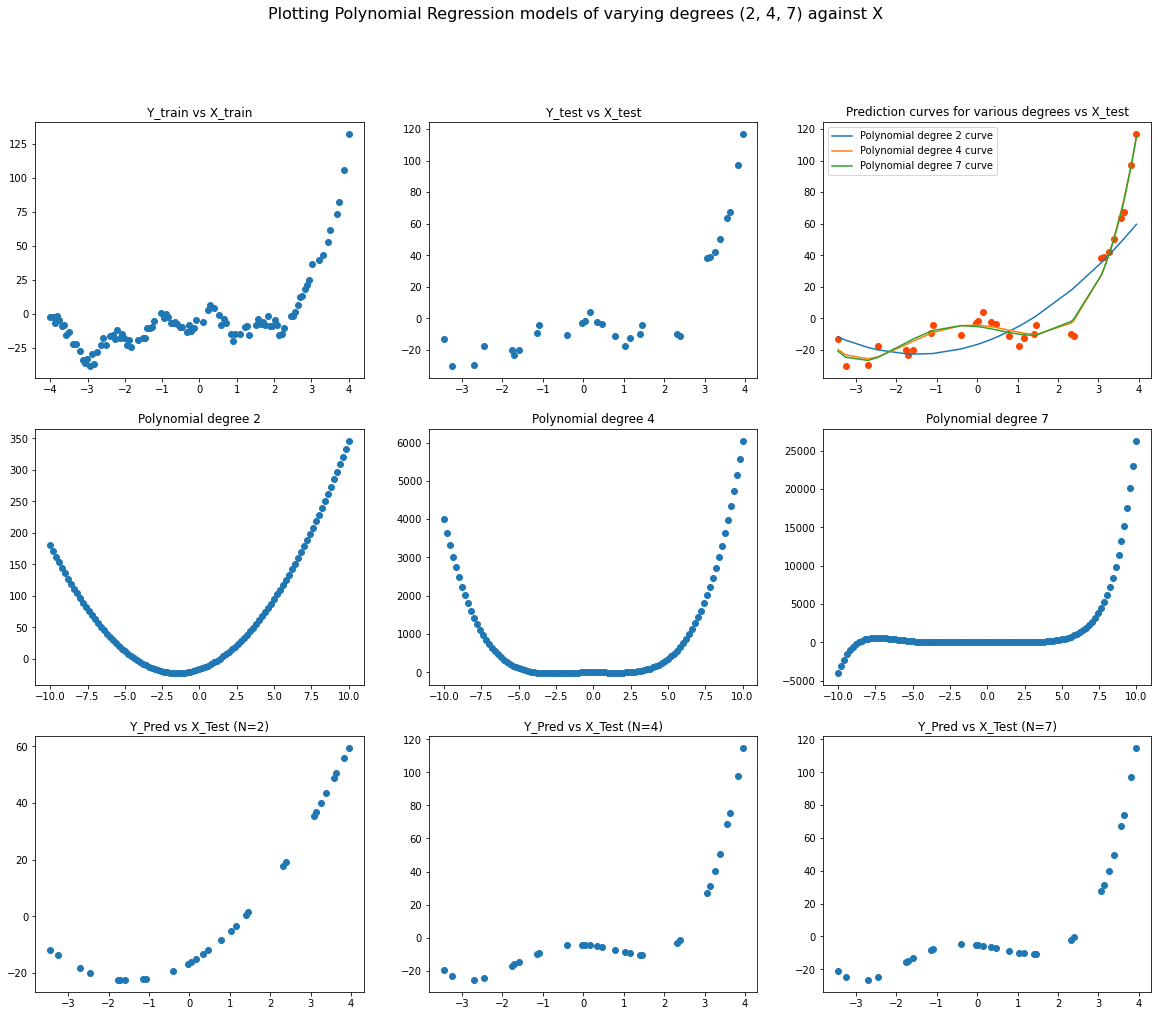

In [187]:
print("100% data")
train_rmses_100, test_rmses_100 = plot_curves(x_train, y_train, x_test, y_test)

# Answer : 

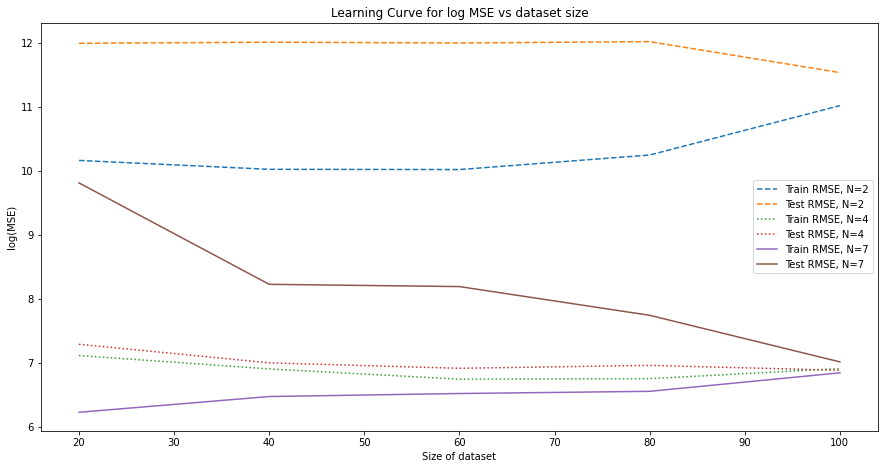

In [188]:
# Let's set training size array -
N = [20, 40, 60, 80, 100]

train_rmse_2 = [np.log(train_rmses_20[0]**2), np.log(train_rmses_40[0]**2), np.log(train_rmses_60[0]**2),
               np.log(train_rmses_80[0]**2), np.log(train_rmses_100[0]**2)] 
test_rmse_2 = [np.log(test_rmses_20[0]**2), np.log(test_rmses_40[0]**2), np.log(test_rmses_60[0]**2),
               np.log(test_rmses_80[0]**2), np.log(test_rmses_100[0]**2)]

train_rmse_4 = [np.log(train_rmses_20[1]**2), np.log(train_rmses_40[1]**2), np.log(train_rmses_60[1]**2),
               np.log(train_rmses_80[1]**2), np.log(train_rmses_100[1]**2)] 
test_rmse_4 = [np.log(test_rmses_20[1]**2), np.log(test_rmses_40[1]**2), np.log(test_rmses_60[1]**2),
               np.log(test_rmses_80[1]**2), np.log(test_rmses_100[1]**2)]

train_rmse_7 = [np.log(train_rmses_20[2]**2), np.log(train_rmses_40[2]**2), np.log(train_rmses_60[2]**2),
               np.log(train_rmses_80[2]**2), np.log(train_rmses_100[2]**2)] 
test_rmse_7 = [np.log(test_rmses_20[2]**2), np.log(test_rmses_40[2]**2), np.log(test_rmses_60[2]**2),
               np.log(test_rmses_80[2]**2), np.log(test_rmses_100[2]**2)]

# Let's plot!
plt.figure(figsize=(15,7.5))
plt.plot(N, train_rmse_2, label="Train RMSE, N=2", linestyle='--')
plt.plot(N, test_rmse_2, label="Test RMSE, N=2", linestyle='--')
plt.plot(N, train_rmse_4, label="Train RMSE, N=4", linestyle=':')
plt.plot(N, test_rmse_4, label="Test RMSE, N=4", linestyle=':')
plt.plot(N, train_rmse_7, label="Train RMSE, N=7")
plt.plot(N, test_rmse_7, label="Test RMSE, N=7")
plt.xlabel("Size of dataset")
plt.ylabel("log(MSE)")
plt.title("Learning Curve for log MSE vs dataset size")
plt.legend()

We can see that as we increase the dataset size, the training

We can clearly see from the plot that for N=7, the model heavily overfits when the data size is lower (very high test MSE vs low training MSE).

For N=2, both the training and test MSE are comparatively much higher but donverge as dataset size increases indicating underfitting. This might be harder to catch if we didn't compare against MSE plots for higher order polynomial models.

Finally, for N=4, we can see both the training MSE and test MSE are very similar throughout the range of size of dataset and both decrease as size of dataset increases.

# Question 3: Stochastic Gradient Descent Improvements (10 pts)

1. (5 pts) Read this [blog](https://medium.com/optimization-algorithms-for-deep-neural-networks/gradient-descent-with-momentum-dce805cd8de8) on medium and describe in your own words how momentum leads to a faster convergence of the loss function. 

2. (5 pts) Read this [blog](https://sweta-nit.medium.com/batch-mini-batch-and-stochastic-gradient-descent-e9bc4cacd461) on medium and explain in your own words the advantages of Mini-batch Stochastic Gradient Descent. 


# Answer : 


# 1) 

Let's take a look at the loss function that needs to be minimized in the article -

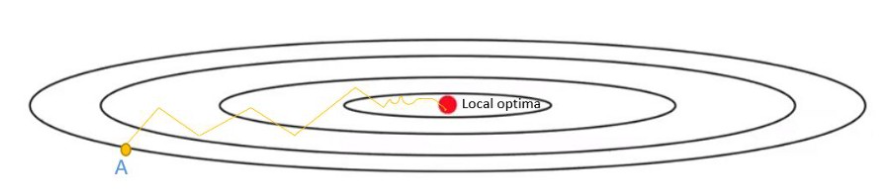

Suppose the we start at point A on the loss function graph and optimize via Gradient Descent.
In this scenario, we can see Gradient Descent causes us to bounce around from point A to B to C and so forth. Oscillations in the vertical direction cause the no. of steps required to arrive at local optima to be very high and thus decrease speed and efficiency.

It is possible to increase learning rate to speed up the process. However, let's look at the foormula for updating weights and biases in Gradient Descent -

$ w = w - \alpha dw$

where,

$\text{w = weight w  }$

$\alpha=\text{ learning rate}$

$\text{dw = derivative of loss function J wrt weight w  } \frac{dJ}{dw}$


If we simply increase the learning rate, it will lead to a higher magnitude of oscillations in both the vertical and horizontal direction. With a sufficiently high learning rate, the model might diverge -

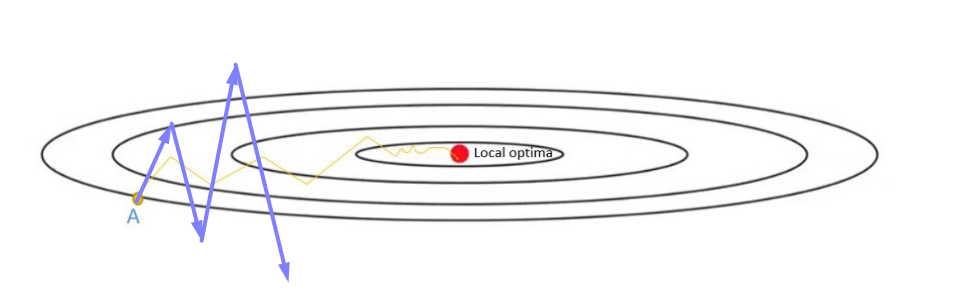

We want to be able to dampen the oscillations in the vertical direction while propagating them in the horizontal direction -

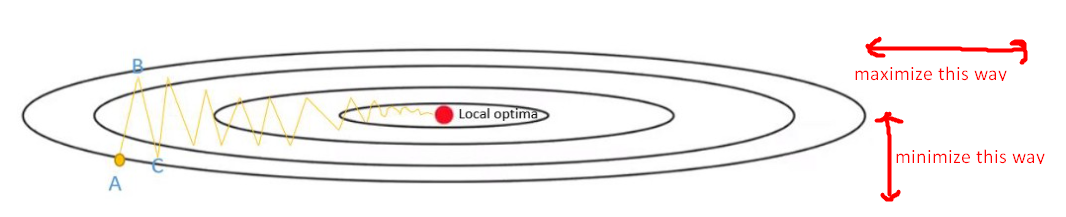

Hence, when we update the weights in consecutive iterations, instead of directly using the derivative of the weights, we can first calculate an exponentially weighted average of the previos derivative of weights (Vdw) and use that to update the weights.

$ Vdw = \beta Vdw + (1-\beta)dw$

where

$\beta = \text{momentum}$

$Vdw = \text{exponentially weighted average of weight derivatives}$

Let's try to think intuitively -

We first calculate a weighted average of the previous slopes of the loss function wrt to weights. If certain set of weights keep causing vertical oscillations in opposite directions, their slopes in each iteration will be of high magnitude but opposite sign. This means the weighted average (Vdw) of these wights will be really small. This ensures that oscillations in these directions are dampened (minimized in vertical direction) based on paraeter Beta or 'Momentum'. However, the weighted average of the weights that continuously cause movement in the right direction will continue increasing (maximizing in the horizontal direction) and hence learning will be faster without the threat of divergence caused b y increasing the learning rate.

# 2)

Gradient Descent is nothing but a technique to optimize the cost function of a model (in our case, a multiple perceptron or neural network).

We define the Cost function of the model as the sum of values of the Loss function calculated for each data point fed to the network as input per epoch (epoch is nothing but once cycle of forward propagation to calculate cost followed by one cycle of backward propagation to update weights).

For a dataset of size 'M' let's define 3 techniques of feeding the data to the neural network -

1) Batch Gradient Descent - Feed all 'M' data points from the training set to the neural network for every single epoch.
i.e the Cost function J for each epoch will be calculated as such -

$ J(X,w) = \Sigma_{i=1}^ML(X_i,w)$

This method has certain advantages, for eg. It will arrive at a precise value for a minima but may get stuck on a local minima. Also, it is extremely computationally and resourcefully heavy.

2) Stochastic Gradient Descent - This is pretty much the opposite of Batch Gradient Descent. Instead of waiting for every single point in the dataset to be forward propagated (and their subsequent losses to be calculated), the model only takes one random data point as input per epoch and updates the weights according to it's loss function value.

$ J(X,w) = L(X_i,w)$

where

$ X_i =\text{ randomly chosen data point}$

While this technique ensures that the speed per epoch and hence the learning is really fast, it will take much lonegr to end up at the global optimal minima of the cost function, if _ever_. However, since each data point per epoch is chosen randomly and the weights are updated based on the gradient of the loss function for just ONE point (as opposed to the entire summed cost function in Batch Gradient Descent), the updation of weights is slightly more random than that of Batch Gradient Descent. This might cause the algorithm to never settle on a precise value for a minima (due to the added noise at each iteration when updating weights). However, this noise helps the algorithm to not get stuck on local minima and usually does a better job at finding the global minima. If a close approximation of the global minima is an acceptable compromise, SGD might be the way to go.

3) Mini Batch Gradient Descent - This is the sweet middle child that tries really hard to stand out. It is essentially a combination of Batch and Stochastic Gradient Descent, finding a middle ground between the two.

Instead of taking the entire dataset or just one data point at a time, we can feed Mini Batches with 'k' data points (where k is strictly lesser than M) to the network per epoch. This ensures that we train the neural network with enough information per epoch so as to help it arrive at the global with reasonable speed without requiring unreasonably high resources. Tuning will be required to find the optimal 'k' value depending on the tolerance levels for accuracy and speed of the model.

$ J(X,w) = \Sigma_{i=1}^kL(X_i,w)$

where

$k =\text{ size of Mini Batch}$

In summary, we can show the relationship between Batch, Mini Batch and Stochastic Gradient Descent as follows -

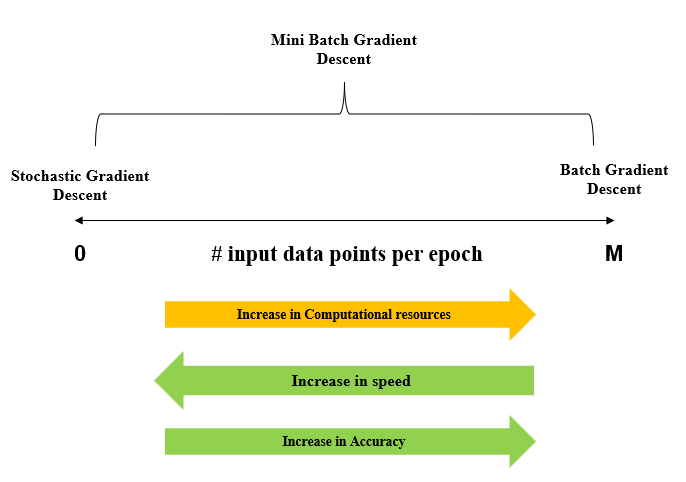

# Question 4: Stochastic Gradient Descent (30 pts)

1.(**10 pts**) Stochastic gradient descent derivation<br>

Use stochastic gradient descent to derive the coefficent updates for the 4 coefficients $w_0, w_1, w_2, w_3$ in this model：

$$ y = w_0 + w_1e^{-x_1} + w_2 x_1 + w_3x_1x_2 $$ 


2.(**20 pts**) Stochastic gradient descent coding <br>

Code an SGD solution in Python for this non-linear model$$ y = w_0 + w_1e^{-x_1} + w_2x_1 + w_3x_1x_2 $$  The template of the solution class is given. The init function of the class takes as input the learning rate, regularization constant and number of epochs. The fit method must take as input X, y. The predict method takes an X value (optionally, an array of values). 

a) (**15 pts**) Use the expression derived in part 1 to predict the data given in 'SGD_samples.csv', for 15 epochs, using learning rates: [0, .0001, .001, .01, 0.1, 1, 10, 100] and regularization (ridge regression) constants: [0,10,100]. For the best 2 combinations of learning_rate and regularization for SGD, plot MSE and the $w$ parameters as a function of epoch (for 15 epochs) . 

b) (**5 pts**) Report the MSE of the two best combinations of learning rate and regularization constant.

# Derivation:

Let's assume the loss function is Sum of Squares Error + $ L_2$ Regularization (Ridge Regularization).

Let the output of model be denoted by $\hat{y}$ and the actual output be $y$

$ \hat{y} = w_0 + w_1e^{-x_1} + w_2 x_1 + w_3x_1x_2 $

Let's represent all weights as vector $w$ such that -

$ w = [w_0, w_1, w_2, w_3]$

Also, let's represent the mapping functions that map input variable $x=\{x_1, x_2\}$ to $y$ be represented by vector $\phi(x)$ such that -

$\phi(x)=\{1, e^{-x_1}, x_1, x_1x_2\}$

$\therefore \phi(x)=\{\phi_0{x}, \phi_1({x}), \phi_2({x}), \phi_3({x})\}$

Hence, we can represent $\hat{y}$ as -

$\hat{y}=w^T\phi(x)$

Now, the loss function with $L_2$ regularization with parameter $\alpha$ is as follows -

$\mathcal{L}(\hat{y}, y)=\frac{1}{2}(y-\hat{y})^2 + \alpha\Sigma_{i=1}^3w_i^2$

$\therefore \mathcal{L}(\hat{y}, y)=\frac{1}{2}(y-\hat{y})^2 + \alpha w_1^2 + \alpha w_2^2 + \alpha w_3^2$

$\therefore \mathcal{L}=\frac{1}{2}(y-w^T\phi(x))^2 + \alpha w_1^2 + \alpha w_2^2 + \alpha w_3^2\dots\text{simply writing loss function as } \mathcal{L}$


Now that we caclulated the loss function, we can backpropagate by calculating the derivatives of the loss function wrt all weights.

Let's find derivative of the loss function $\mathcal{L}$ wrt to weight $w_n$ where $n=\{0,1,2,3\}$ -

$\frac{dL}{dw_n} = \nabla_n\mathcal{L}=-2\frac{1}{2}(y-w^T\phi(x)).\phi_n(x) + 2\alpha w_n$

$\therefore \nabla_n\mathcal{L}=-error.\phi_n(x) + 2\alpha w_n\dots \text{where error = }y-w^T\phi(x)$

Hence, for each weight we can write the derivatives as follows -

$\nabla_0\mathcal{L}=-error.\phi_0(x)$

$\therefore \nabla_0\mathcal{L}=-error$

Similarly,

$\nabla_1\mathcal{L}=-error.\phi_1(x) + 2\alpha w_1$

$\therefore \nabla_1\mathcal{L}=-error.e^{-x_1}+2\alpha w_1$

$\nabla_2\mathcal{L}=-error.\phi_2(x) + 2\alpha w_2$

$\therefore \nabla_2\mathcal{L}=-error.x_1+2\alpha w_2$

$\nabla_3\mathcal{L}=-error.\phi_3(x) + 2\alpha w_3$

$\therefore \nabla_3\mathcal{L}=-error.x_1x_2+2\alpha w_3$


We can now write the weight updation equations at epoch $\tau$ as follows where $\eta$ = learning rate -

$w_0^{\tau+1}=w_0^\tau - \eta\nabla_0\mathcal{L}$

$w_1^{\tau+1}=w_1^\tau - \eta\nabla_1\mathcal{L}$

$w_2^{\tau+1}=w_2^\tau - \eta\nabla_2\mathcal{L}$

$w_3^{\tau+1}=w_3^\tau - \eta\nabla_3\mathcal{L}$

In [ ]:
# Only use this code block if you are using Google Colab.
# If you are using Jupyter Notebook, please ignore this code block. You can directly upload the file to your Jupyter Notebook file systems.
from google.colab import files

## It will prompt you to select a local file. Click on “Choose Files” then select and upload the file. 
## Wait for the file to be 100% uploaded. You should see the name of the file once Colab has uploaded it.
uploaded = files.upload()

In [189]:
%matplotlib inline
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time
import random

class Regression:
    
    def __init__(self, learning_rate, regularization, n_epoch):
        self.learning_rate = learning_rate
        self.n_epoch = n_epoch
        self.regularization = regularization
        # initialize whichever variables you would need here
        self.coef = np.zeros(4) # added reshape
        
    def sgd(self, gradient):
        self.coef = self.coef - self.learning_rate*gradient # = please put your codes here to update the self.coef using SGD
    
    def fit(self, X, y, update_rule='sgd', plot=False):   
        mse = []
        coefs = []
        X = self.get_features(X)
        for epoch in range(self.n_epoch):
            for i in range(X.shape[0]):
                #print("Input - ",i)
                # Compute error
                   #please put your codes here
                error = y[i] - np.dot(self.coef,X[i,:].T)
                #print("error - ", error)
                # Compute gradients
                    #please put your codes here
                grad_0 = -error
                #print(self.coef)
                grad_1 = -error*X[i,1] + 2*self.coef[1]*self.regularization
                #print("grad_1 is - ", grad_1)
                #print("self.coef.T - ",self.coef.shape)
                #print("X transpose - ", X[i,:].T.shape)
                #print("y[i] - ", y[i].shape)
                #print("y[i] - ", y[i])
                grad_2 = -error*X[i,2] + 2*self.coef[2]*self.regularization
                grad_3 = -error*X[i,3] + 2*self.coef[3]*self.regularization
                gradient = np.array([grad_0, grad_1, grad_2, grad_3])
                #print("Gradient is - ",gradient)
                # Update weights
                self.sgd(gradient)
                #time.sleep(1000)

            coefs.append(self.coef)
            #print("coefs are - ", self.coef)
            #print("y - ", y.shape)
            residuals = y - self.linearPredict(X)         
            mse.append(np.mean(residuals**2))
            #print("MSE is- ",mse)
            #time.sleep(10)

        self.lowest_mse = mse[-1]
        if plot == True:
            plt.figure(figsize=(15,7.5))
            plt.figure()
            plt.plot(range(self.n_epoch),mse)
            plt.xlabel('epoch')
            plt.ylabel('MSE')
            plt.figure()
            coefs = np.array(coefs)
            plt.plot(range(self.n_epoch),coefs[:,0],label='w0')
            plt.plot(range(self.n_epoch),coefs[:,1],label='w1')
            plt.plot(range(self.n_epoch),coefs[:,2],label='w2')
            plt.plot(range(self.n_epoch),coefs[:,3],label='w3')
            plt.legend()
            plt.xlabel('epoch')
            plt.ylabel('parameter value')
        #print("MSE - ",mse)
        return mse[-1]

    def get_features(self, X):
        '''
        this output of this function can be used to compute the gradient in `fit`
        '''
        x = np.zeros((X.shape[0], 4))
        x[:,0] = 1
        x[:,1] = np.exp(-X[:,0])
        x[:,2] = X[:,0]
        x[:,3] = X[:,0]*X[:,1]
        
        
        return x
        
    def linearPredict(self, X):
        #print("X.shape - ",X)
        #print("coef.T.shape - ",self.coef.T)
        return np.dot(X,self.coef)
      #compute the dot product of self.coef and X

In [190]:
data = pd.read_csv('data/SGD_samples.csv')
X = np.array([data['x1'].values, data['x2'].values]).T
y = data['y'].values
n_epochs = 15
learning_rate = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
regularization = [0, 10, 100]


# Answer :

In [193]:
# First, let's pass the X and y data as it is in its entirety to the Regression model and check -

mse_matrix = pd.DataFrame(np.zeros((len(learning_rate), len(regularization))), index = learning_rate, columns=regularization)
for i in mse_matrix.index:
    for j in mse_matrix.columns:
        rg = Regression(learning_rate=i, regularization=j,n_epoch=15) 
        mse_matrix.loc[i,j] = rg.fit(X,y)

# Let's look at MSE -
mse_matrix

C:\Users\Mihir\AppData\Local\Temp\ipykernel_27372\2231732006.py:54: RuntimeWarning: overflow encountered in square
  mse.append(np.mean(residuals**2))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_27372\2231732006.py:36: RuntimeWarning: overflow encountered in double_scalars
  grad_1 = -error*X[i,1] + 2*self.coef[1]*self.regularization
C:\Users\Mihir\AppData\Local\Temp\ipykernel_27372\2231732006.py:42: RuntimeWarning: overflow encountered in double_scalars
  grad_2 = -error*X[i,2] + 2*self.coef[2]*self.regularization
C:\Users\Mihir\AppData\Local\Temp\ipykernel_27372\2231732006.py:43: RuntimeWarning: overflow encountered in double_scalars
  grad_3 = -error*X[i,3] + 2*self.coef[3]*self.regularization
C:\Users\Mihir\AppData\Local\Temp\ipykernel_27372\2231732006.py:19: RuntimeWarning: invalid value encountered in subtract
  self.coef = self.coef - self.learning_rate*gradient # = please put your codes here to update the self.coef using SGD
C:\Users\Mihir\AppData\Local\Temp\ipykernel_27372\223

,0,10,100
0.0001,0.036821,0.040568,4.068251e-02
0.0010,0.030496,0.033750,3.380016e-02
0.0100,0.027391,0.033870,1.667319e+59
0.1000,0.030988,inf,NaN
1.0000,inf,NaN,NaN
10.0000,NaN,NaN,NaN
100.0000,NaN,NaN,NaN


In [194]:
# Report MSE -

best = [mse_matrix.index[1], mse_matrix.columns[0]]
best_2 = [mse_matrix.index[2], mse_matrix.columns[0]]

print("The two minimum values of MSE are - \n", mse_matrix.iloc[1,0]," , ",mse_matrix.iloc[2,0])

print("The corresponding learning rates and regularization parameters are - \n",best,"\n",best_2)

The two minimum values of MSE are - 
 0.03049599152007352  ,  0.027391087575201013
The corresponding learning rates and regularization parameters are - 
 [0.001, 0] 
 [0.01, 0]


For learning rate  0.001  and regularization parameter  0  with MSE  0.03049599152007352
For learning rate  0.01  and regularization parameter  0  with MSE  0.027391087575201013


0.027391087575201013

<Figure size 1080x540 with 0 Axes>

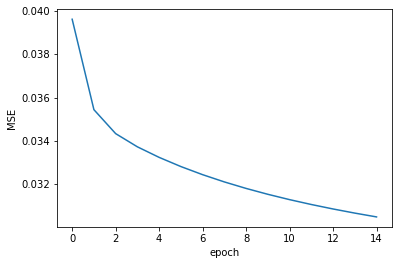

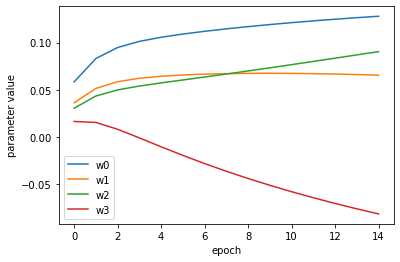

<Figure size 1080x540 with 0 Axes>

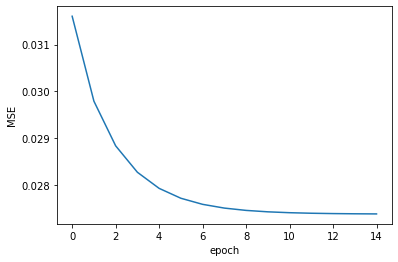

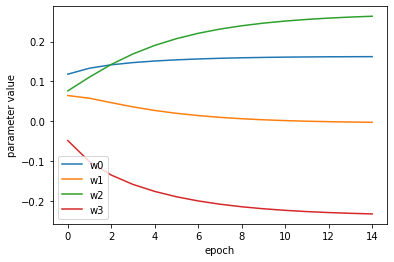

In [195]:
# Let's plot for corresponding values -

rg = Regression(learning_rate=best[0], regularization=best[1],n_epoch=15)
print("For learning rate ",best[0]," and regularization parameter ",best[1]," with MSE ",mse_matrix.iloc[1,0])
rg.fit(X, y, plot=True)


rg = Regression(learning_rate=best_2[0], regularization=best_2[1],n_epoch=15)
print("For learning rate ",best_2[0]," and regularization parameter ",best_2[1]," with MSE ",mse_matrix.iloc[2,0])
rg.fit(X, y, plot=True)